In [2]:
# EDA with much code repurposed from https://www.kaggle.com/code/hasanbasriakcay/birdclef22-eda-noise-reduction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
train = pd.read_csv("../data/train_metadata.csv")

In [4]:
train.head(3)

,Unnamed: 0,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,duration,channels,bitrate,sample_rate
0,0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg,27.350219,1,72000,32000
1,1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg,15.804094,1,72000,32000
2,2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg,29.257156,1,72000,32000


In [5]:
num_species = len(train["primary_label"].unique())

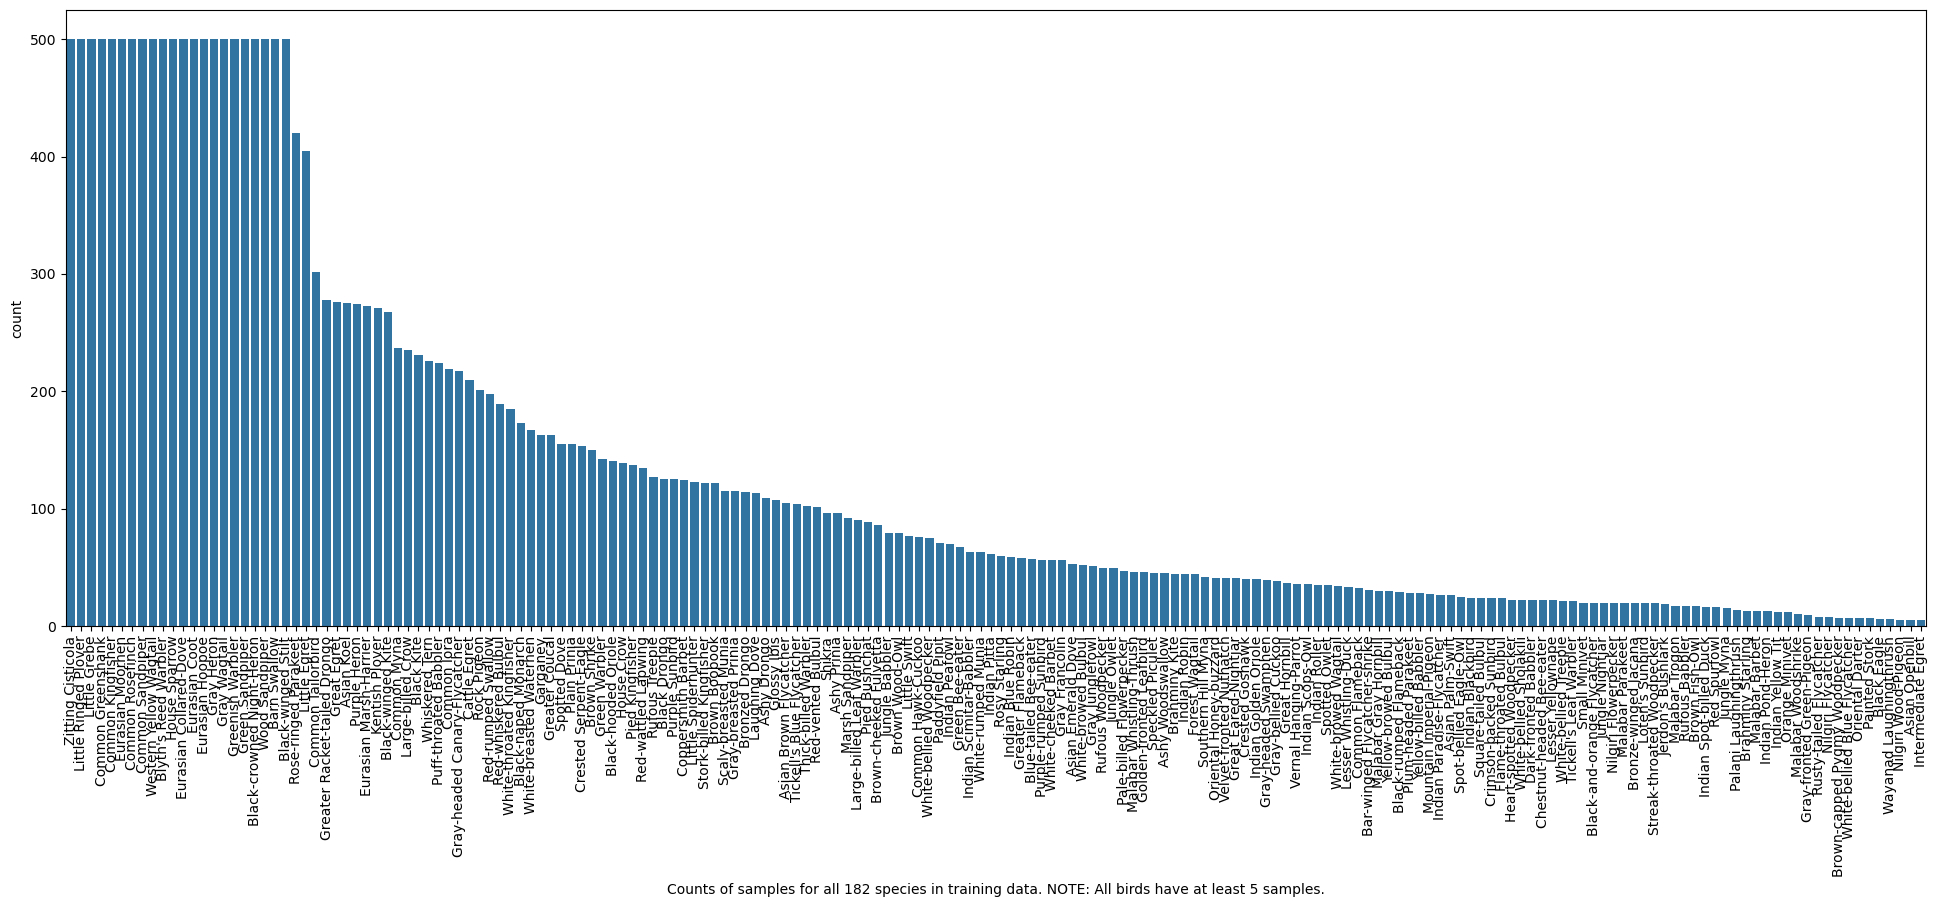

In [6]:
fig, ax = plt.subplots(figsize=(24, 8))
freqs = sns.countplot(data=train, x='common_name', ax=ax, order=train['common_name'].value_counts().index)
freqs.set_xlabel('Counts of samples for all ' + str(num_species) + ' species in training data. NOTE: All birds have at least 5 samples.')
plt.xticks(rotation=90);

There are 2953 recordings with rating at most 2.5


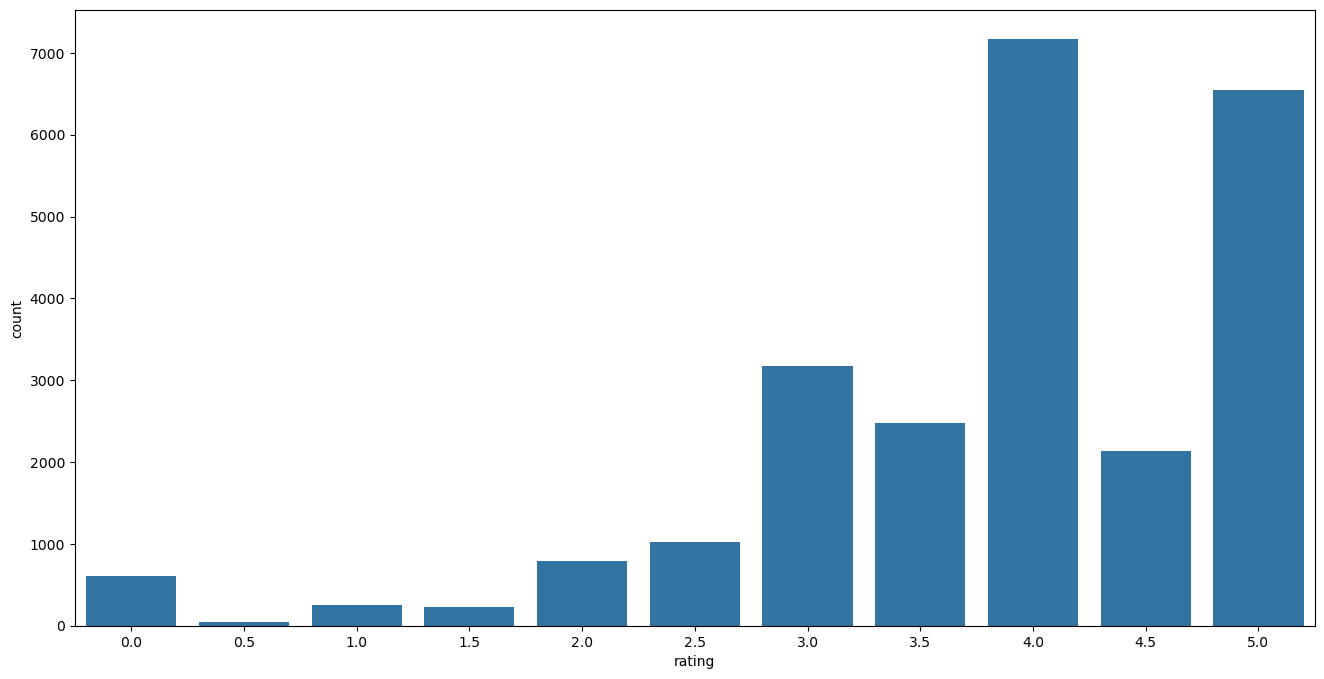

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=train, x='rating', ax=ax);
print("There are " + str(len(train[train["rating"] <= 2.5])) + " recordings with rating at most 2.5")

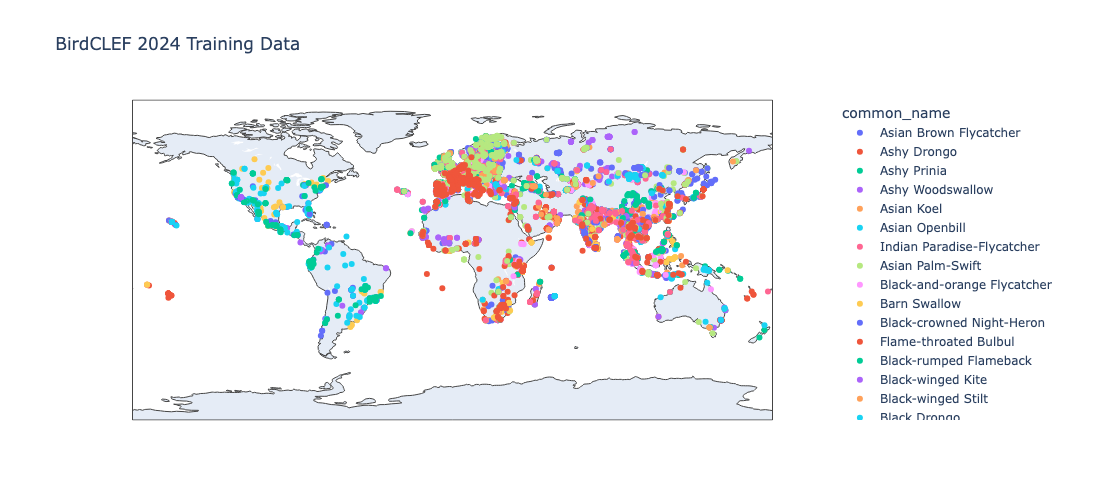

In [9]:
fig = px.scatter_geo(
    train,
    lat="latitude",
    lon="longitude",
    color="common_name",
    width=1_000,
    height=500,
    title="BirdCLEF 2024 Training Data",
)
fig.show()

In [10]:
# All our data is single channel, 72000 bitrate, 32000 sample rate. Very clean!
train[["channels","bitrate", "sample_rate"]].value_counts()

channels  bitrate  sample_rate
1         72000    32000          24459
Name: count, dtype: int64

In [11]:
# For each bird type, we compute the total duration of clips we have for that species.
total_durations = train.groupby(by = "common_name")["duration"].sum().sort_values(ascending=False)

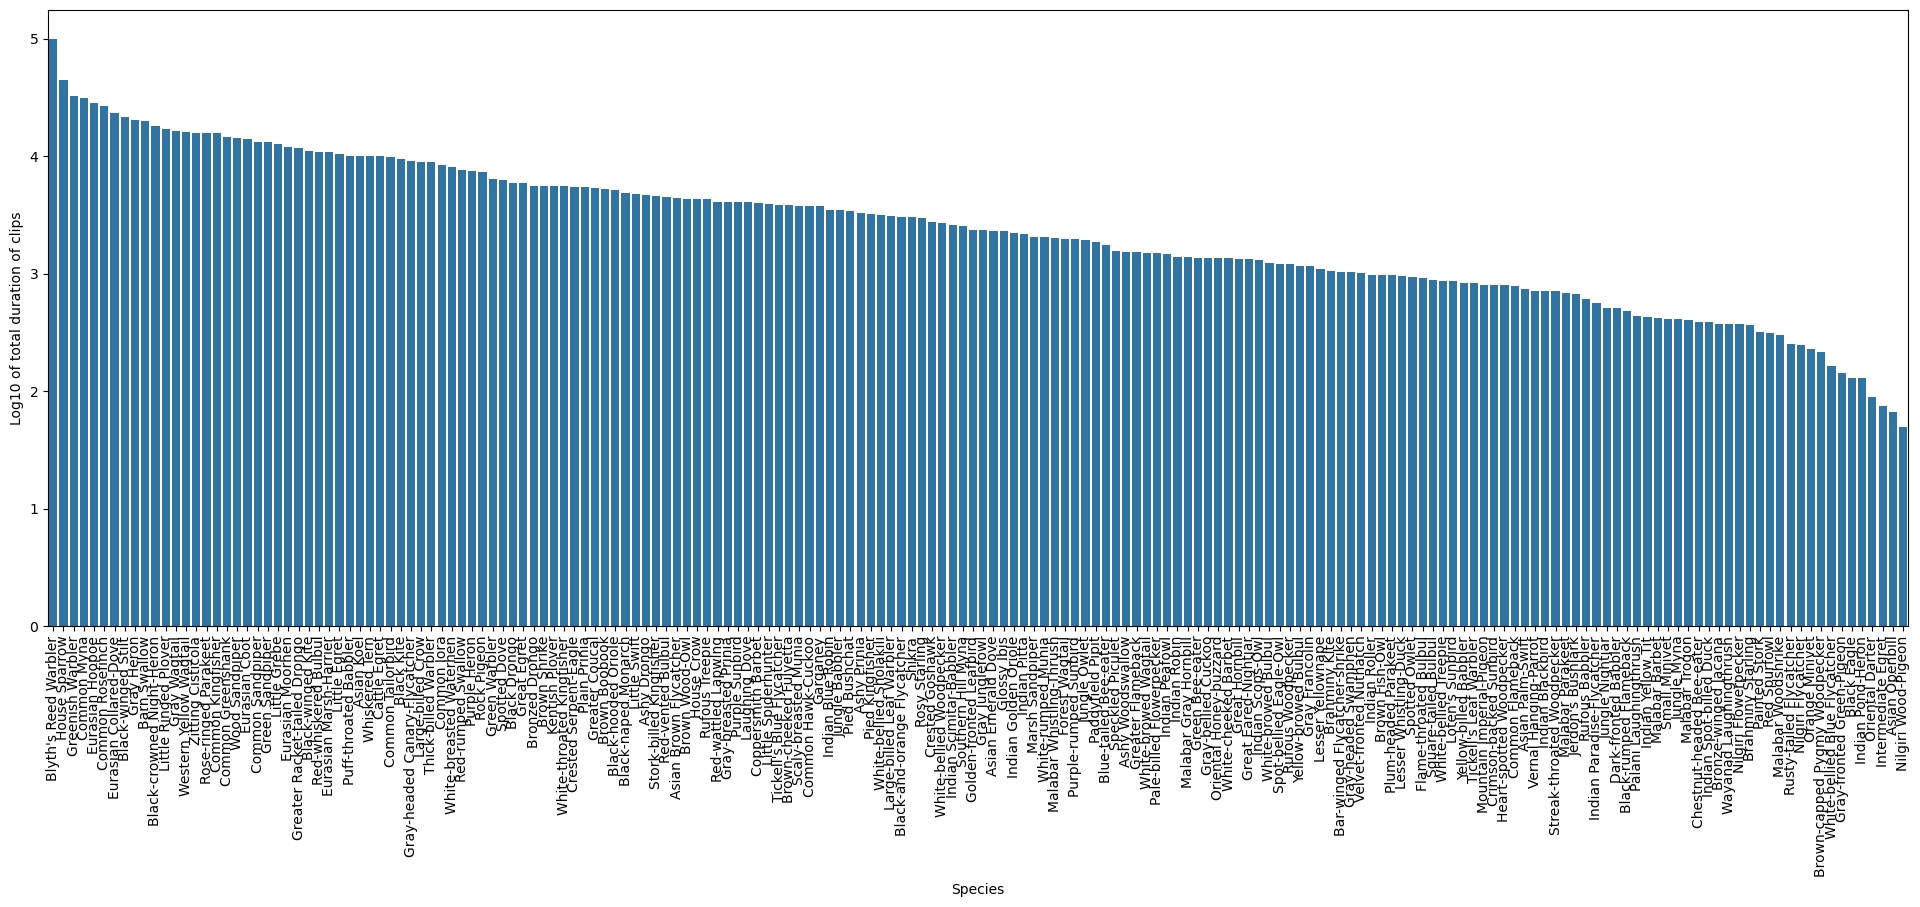

In [12]:
fig, ax = plt.subplots(figsize=(24, 8))
durations = sns.barplot(np.log10(total_durations))
durations.set_ylabel('Log10 of total duration of clips')
durations.set_xlabel('Species')
plt.xticks(rotation=90);

(array([7.000e+00, 2.400e+01, 7.400e+01, 2.760e+02, 5.390e+02, 2.509e+03,
        3.765e+03, 4.260e+03, 4.323e+03, 3.740e+03, 2.612e+03, 1.325e+03,
        6.020e+02, 2.150e+02, 8.800e+01, 6.100e+01, 1.600e+01, 1.700e+01,
        2.000e+00, 4.000e+00]),
 array([-0.32790214, -0.12272933,  0.08244347,  0.28761628,  0.49278909,
         0.6979619 ,  0.90313471,  1.10830751,  1.31348032,  1.51865313,
         1.72382594,  1.92899875,  2.13417155,  2.33934436,  2.54451717,
         2.74968998,  2.95486279,  3.16003559,  3.3652084 ,  3.57038121,
         3.77555402]),
 <BarContainer object of 20 artists>)

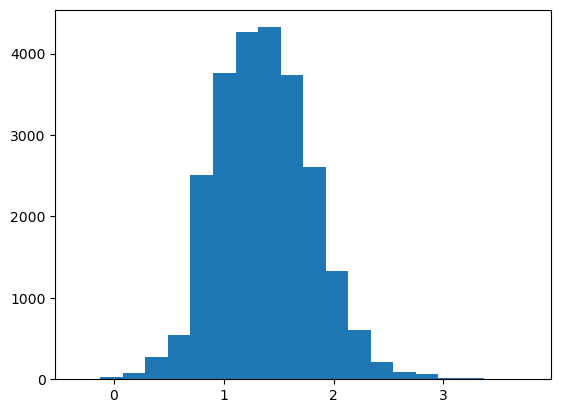

In [22]:
# Most clips are 10-100 seconds
plt.hist(np.log10(train["duration"]), bins = 20)